# QTM 385 Project 2
Wenkai Xu


# Which one is the most imporntant factor in a basketball game?
--------2 points, 3 points or rebounds?

# Introduction:
Why do I choose this question as my topic?
One day when I was playing basketball with my friends, we had come up with one question: what factor contributes to a victory in a professional basketball game. I am a shooter so I am in favor of 3 points. I think 3 points are efficient in accumulating points and usually Clutch shots are 3-point-shot. However, one of my friend (by the way he plays as a Forward) argued that 2 points are the key element in winning a game and 3-point-shot only consist a little proportion of field goals. Of course there're other factors like turnovers, assists, blocks or etc. that might influence a game, however, I personally think field goals(2 and 3 points), plus rebounds might have the huge impact. Thus, I will choose 2-point-shot, 3-point-shot and rebound as my key independent variables. In order to draw a conclusion quantitatively, I decide to use python to explore how 2 points, 3 points and rebounds are related to a basketball game and how they affect one team's win rate. In this project, I will use some Dataframe logical operations to abridge the original dataset and show some interesting facts.Also, I will do a single regression of 3-points/2 points accuracy on win rate based on 1998-2008 NBA all team data. At last, I will use matplotlib to visualize the regression and draw some conclusions. 

In [1]:
import pandas as pd
import rpy2


import matplotlib.pyplot as plt 
import numpy as np
from sklearn import datasets, linear_model

In [2]:
df=pd.read_csv('https://github.com/TodXu/project/blob/master/basketball_teams.csv?raw=TRUE')
df.shape

(1307, 60)

In [3]:
df.columns

Index(['year', 'lgID', 'tmID', 'franchID', 'confID', 'divID', 'rank',
       'confRank', 'playoff', 'name', 'o_fgm', 'o_fga', 'o_ftm', 'o_fta',
       'o_3pm', 'o_3pa', 'o_oreb', 'o_dreb', 'o_reb', 'o_asts', 'o_pf',
       'o_stl', 'o_to', 'o_blk', 'o_pts', 'd_fgm', 'd_fga', 'd_ftm', 'd_fta',
       'd_3pm', 'd_3pa', 'd_oreb', 'd_dreb', 'd_reb', 'd_asts', 'd_pf',
       'd_stl', 'd_to', 'd_blk', 'd_pts', 'o_tmRebound', 'd_tmRebound',
       'homeWon', 'homeLost', 'awayWon', 'awayLost', 'neutWon', 'neutLoss',
       'confWon', 'confLoss', 'divWon', 'divLoss', 'pace', 'won', 'lost',
       'games', 'min', 'arena', 'attendance', 'bbtmID'],
      dtype='object')

# Data Collection & Data Frame
I have downloaded the dataset from Kaggle.com. It is a huge dataset which contain all the infomation of NBA teams from year 1967 to 2008. From the method df.shape above, we can see that the whole dataset has 1307 rows and 60 columns.I am only interested in part of the data of the big dataset. I only want to observe the column of 'o_fgm'(field goal made), 'o_fga'(field_goal_attemped),'o_3pm'(3 point made), 'o_3pa'(3 point attemped), 'won','loss' and etc. from year 1998 to 2008. Anyway, here are some of my dataFrame operations:

# Data Frame Operation

In [4]:
df.groupby('year').o_3pm.mean().head(20)

year
1946    0.0
1947    0.0
1948    0.0
1949    0.0
1950    0.0
1951    0.0
1952    0.0
1953    0.0
1954    0.0
1955    0.0
1956    0.0
1957    0.0
1958    0.0
1959    0.0
1960    0.0
1961    0.0
1962    0.0
1963    0.0
1964    0.0
1965    0.0
Name: o_3pm, dtype: float64

In [5]:
df1=df[(df.year>=1998) & (df.year<=2008)]

After checking the whole dataset, I have found that in early days (from 1946 to 1979), the 3-points of each team is 0! This means NBA began to have 3-points after 1979. And in early 80s, 3 points made is much lower than recent years. In order to keep the data up-to-date, I decide to choose the recent 10 years. And I have modified df into df1 to choose year 1998 to 2008 as my observation.

In [6]:
df2=df1.iloc[:,[0,2,8,9,16]]
df2['winrate']=df1['won']/df1['games']
df2['Acc3p']=df1['o_3pm']/df1['o_3pa']
df2['Acc2p']=(df1['o_fgm']-df1['o_3pm'])/(df1['o_fga']-df1['o_3pa'])
df2.describe()

D:\Ana\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Ana\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Ana\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

,year,o_oreb,winrate,Acc3p,Acc2p
count,324.000000,324.000000,324.000000,324.000000,324.000000
mean,2003.046296,931.780864,0.500000,0.352582,0.470982
std,3.169273,138.149215,0.149120,0.022173,0.019118
min,1998.000000,472.000000,0.158537,0.264151,0.421143
25%,2000.000000,867.500000,0.402439,0.339475,0.458929
50%,2003.000000,943.000000,0.512195,0.352753,0.470910
75%,2006.000000,1023.250000,0.609756,0.367285,0.481511
max,2008.000000,1345.000000,0.817073,0.406764,0.537664


I have abriged df1 into df2 by deleting some of unnessassary columns and adding winrate, Acc3p(3 point Accuracy) and Acc2p(2 point Accuracy) into new columns. We can see that the average of 3 point accuracy of all teams in 10 years is 0.352 and average 2 point accuracy is 0.471. 

# Visualization
This pie chart shows the percentage of 2-point-shots on the total field goals.

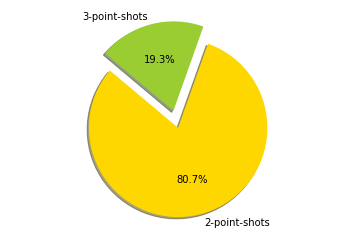

In [7]:
labels=['2-point-shots','3-point-shots']
sizes=[df1.o_fga.mean()-df1.o_3pa.mean(),df1.o_3pa.mean()]
colors = ['gold', 'yellowgreen']
explode = (0.2, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

From the graph, we can see that players have made much more 2 points attemps than 3 points( (o_fga-o_3pa > o_3pa ), 80% of the field goals are made up of 2-point shot attempts. Besides, 2 points shots have more accuracy than 3 points( 0.471>0.352 ). From these data, I can conclude that 2 point is a more common and easy way to earn points in a match compared with 3 point shot.

# Interpretations

In [8]:
df4=df2[(df2.playoff=="NC")]
df4

,year,tmID,playoff,name,o_oreb,winrate,Acc3p,Acc2p
1006,1998,SAS,NC,San Antonio Spurs,614,0.740000,0.330134,0.476451
1024,1999,LAL,NC,Los Angeles Lakers,1117,0.817073,0.328558,0.482467
1053,2000,LAL,NC,Los Angeles Lakers,1085,0.682927,0.344314,0.493530
1082,2001,LAL,NC,Los Angeles Lakers,1022,0.707317,0.354413,0.488798
1123,2002,SAS,NC,San Antonio Spurs,939,0.731707,0.353543,0.489159
1134,2003,DET,NC,Detroit Pistons,1014,0.658537,0.344008,0.451553
1182,2004,SAS,NC,San Antonio Spurs,987,0.719512,0.363441,0.477943
1201,2005,MIA,NC,Miami Heat,858,0.634146,0.344899,0.517298
1242,2006,SAS,NC,San Antonio Spurs,761,0.707317,0.381166,0.504300
1248,2007,BOS,NC,Boston Celtics,830,0.804878,0.381074,0.506141


Above is the final champion from 1998 to 2008 and their related rebounds, three-point accuracy and two-point accuracy. Compared with average rebounds of 931, half of the champions have fewer rebounds and even Spurs in 1998 had only 614 rebounds which was nearly 300 below the average. Compared with the average 3-point accuracy of 35.2%, also half of champions had done a worse job. However, 10 out of 11 champitions had significantly higher 2-point accuracy than the average 47.1%. From the data, I can conclude that the best team of the year might not do well in rebounds or 3 points, but they were more likely to have a higher 2 point accuracy. At this time, I feel like 2-point-shot might be a more important factor in a basketball game.

In [9]:
df2[df2.Acc3p>df2.Acc3p.mean()].winrate.mean()

0.5426459719142652

This is the average win rate of a team which had higher 3 point accuracy than the average. This means that if a team is doing well in 3 point than average, this team may have a 54% chance to win(4% increase than normal win rate of 50%).

In [10]:
df2[df2.Acc2p>df2.Acc2p.mean()].winrate.mean()

0.568625

The average win rate of a team which had higher 2 point accuracy than the average, is 56.8. This means that if a team is doing well in 2 point than the average team, then this team may have a 56.8% chance to win(6.8% increase than normal win rate of 50%).

In [11]:
df2[df2.o_oreb>df2.o_oreb.mean()].winrate.mean()

0.4866134006167648

The first two results are pretty intuitive: Higher 2 or 3 point accuracy, higher chance to win. However, I am confused by this result. More rebounds but lower chance to win? I will later do a regression to check this. 

# Group the whole data by teams and Sorting

In [12]:
df3=pd.DataFrame(df2.groupby('name').Acc3p.mean())
df3.sort_index(by='Acc3p',ascending=False).head()

D:\Ana\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


,Acc3p
name,
San Antonio Spurs,0.369841
Dallas Mavericks,0.367219
Phoenix Suns,0.366983
Milwaukee Bucks,0.365789
Toronto Raptors,0.364372


In [13]:
df4=pd.DataFrame(df2.groupby('name').Acc2p.mean())
df4.sort_index(by='Acc2p',ascending=False).head()

D:\Ana\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


,Acc2p
name,
Phoenix Suns,0.493513
Los Angeles Lakers,0.489462
San Antonio Spurs,0.482754
Sacramento Kings,0.481436
Dallas Mavericks,0.481071


In [14]:
df5=pd.DataFrame(df2.groupby('name').o_oreb.mean())
df5.sort_index(by='o_oreb',ascending=False).head()

D:\Ana\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


,o_oreb
name,
Golden State Warriors,1097.181818
Oklahoma City Thunder,999.000000
Washington Wizards,990.090909
New Orleans Hornets,989.200000
Philadelphia 76ers,983.000000


In [15]:
df6=pd.DataFrame(df2.groupby('name').winrate.mean())
df6.sort_index(by='winrate',ascending=False).head()

D:\Ana\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


,winrate
name,
San Antonio Spurs,0.705854
Los Angeles Lakers,0.643947
Dallas Mavericks,0.642084
Detroit Pistons,0.603725
Phoenix Suns,0.593437


I have grouped all the data by teams and have sorted their related 3-point accuracy, 2-point accuracy, rebounds and winrate in a descending order. I have found that Spurs and Lakers are the two best teams during this 10 years: they have highest win rate and they both have 4 final champions.Interestingly, they are also on the leaderboard of 3 point accuracy and 2 point accuracy, which tells us that field goals accuracy does influence the win rate significantly. However, rebounds, are not as important as the other two factors.

# Regression
We cannot avoid regression if we truly want to analyze data quantitatively. I will first do a single variable regression of 3-point accuracy on win rate. And a single variable regression of 2-point accuracy on win rate. Finally I will use matplotlib to visualize the regression.

# Single variable regression of 3-point/2-point accuracy on win rate:

D:\Ana\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
D:\Ana\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
D:\Ana\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
D:\Ana\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


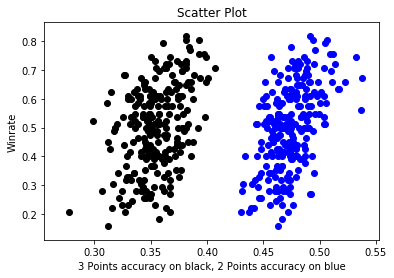

In [16]:
Y = df2['winrate']
X = df2['Acc3p']
Z= df2['Acc2p']
R=df2['o_oreb']

X=X.reshape(len(X),1)
Y=Y.reshape(len(Y),1)
Z=Z.reshape(len(Z),1)
R=R.reshape(len(R),1)
 
# Split the data into training/testing sets
X_train = X[:-250]
X_test = X[-250:]
 
# Split the targets into training/testing sets
Y_train = Y[:-250]
Y_test = Y[-250:]

Z_train = Z[:-250]
Z_test = Z[-250:]

R_train = R[:-250]
 
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.scatter(Z_test, Y_test,  color='blue')
plt.title('Scatter Plot')
plt.xlabel('3 Points accuracy on black, 2 Points accuracy on blue')
plt.ylabel('Winrate')

 
plt.show()

# Visualization

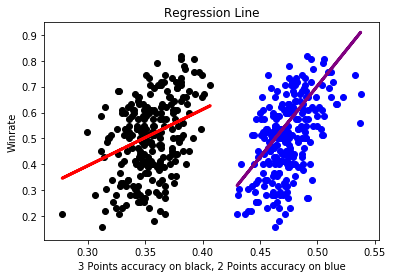

In [17]:
# Create linear regression object
regr = linear_model.LinearRegression()
regr1 = linear_model.LinearRegression()
regr2 = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X_train, Y_train)
regr1.fit(Z_train, Y_train)
regr2.fit(R_train,Y_train)

# Plot outputs
plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)
plt.plot(Z_test, regr1.predict(Z_test), color='purple',linewidth=3)

plt.scatter(X_test, Y_test,  color='black')
plt.scatter(Z_test, Y_test,  color='blue')
plt.title('Regression Line')
plt.xlabel('3 Points accuracy on black, 2 Points accuracy on blue')
plt.ylabel('Winrate')

plt.show()

In the plot, black dots and red regression line are for 3-point; blue dots and purple regression line are for 2-point. Both slopes of the two regression lines are positive, which means field goals accuracy is positively related one team's win rate, just as I expected. The purple line is steeper than the red line, which means 2-point-accuracy might have a larger impact on win rate than 3-point does.

In [18]:
print(regr.coef_)

[[ 2.1721885]]


In [19]:
print(regr1.coef_)

[[ 5.49958422]]


The coefficient of regression of 3-point-accuracy on win rate is 2.172. The coefficient of regression of 2-point-accuracy on win rate is 5.499.

In [20]:
print(regr2.coef_)

[[-0.00013373]]


The coefficient of regression of number of rebounds on win rate is nearly 0, which means rebounds are only sightly related to the win rate.

# Conclusion

To sum up, the accuracy of 2-point and 3-point is indeed important factors in a basketball game because data have shown that they are strongly correlated with NBA team's winrate between 1998 to 2008. Also, my friend's claim might be correct: 2 point-shots are the most essential part in a game. Firstly, 2-point-shots make up 80% of the total field goals. Secondly, 2-point-shots have a stronger correlation with win rate than 3-point-shots have based on the regression analysis.